In [1]:
#import packages
import pandas as pd
import numpy as np
import random
from random import randint

import urllib
import urllib.request
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import chromedriver_binary
import requests

from IPython.core.display import clear_output
import os

import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## 2. EDA part II

In [2]:
male_df = pd.read_csv('merged_ranks.csv')
male_df.columns.str.strip()
male_df.drop(columns=['rank','height_cm','weight_kg','total_points'],axis=1, inplace=True)
male_df.columns= ['age','bmi','rank191','rank192','rank193','rank194','rank195','australia','brazil','canada','denmark','iceland','russian_federation','switzerland','united_kingdom','united_states']
male_df.head()

,age,bmi,rank191,rank192,rank193,rank194,rank195,australia,brazil,canada,denmark,iceland,russian_federation,switzerland,united_kingdom,united_states
0,36,26.2,14443,14821,23679,10964,12648,0,0,0,0,0,0,0,0,0
1,28,26.2,9881,16712,25132,9634,15203,0,0,0,0,0,0,0,0,0
2,37,27.3,36340,11370,14678,3260,10920,0,0,0,0,0,0,0,0,1
3,26,27.2,8828,12089,18389,19076,18188,0,0,0,0,0,0,0,0,1
4,26,26.8,14443,20846,10881,16303,14100,1,0,0,0,0,0,0,0,0


In [3]:
male_df['rank195'] = np.log(male_df['rank195'])
male_df['rank191'] = np.log(male_df['rank191'])
male_df['rank192'] = np.log(male_df['rank192'])
male_df['rank193'] = np.log(male_df['rank193'])
male_df['rank194'] = np.log(male_df['rank194'])
male_df.head()

,age,bmi,rank191,rank192,rank193,rank194,rank195,australia,brazil,canada,denmark,iceland,russian_federation,switzerland,united_kingdom,united_states
0,36,26.2,9.577965,9.603800,10.072344,9.302372,9.445254,0,0,0,0,0,0,0,0,0
1,28,26.2,9.198369,9.723882,10.131897,9.173054,9.629248,0,0,0,0,0,0,0,0,0
2,37,27.3,10.500674,9.338734,9.594105,8.089482,9.298351,0,0,0,0,0,0,0,0,1
3,26,27.2,9.085684,9.400051,9.819508,9.856186,9.808517,0,0,0,0,0,0,0,0,1
4,26,26.8,9.577965,9.944917,9.294773,9.699104,9.553930,1,0,0,0,0,0,0,0,0


In [4]:
male_df.corr()
#smaller rank number is higher on the leaderboard

,age,bmi,rank191,rank192,rank193,rank194,rank195,australia,brazil,canada,denmark,iceland,russian_federation,switzerland,united_kingdom,united_states
age,1.000000,0.097288,0.169594,0.165468,0.151858,0.212404,0.152177,-0.008863,-0.018530,0.003814,-0.033771,-0.028615,-0.005857,-0.010869,-0.015383,0.123361
bmi,0.097288,1.000000,-0.192769,-0.235279,-0.056349,-0.027065,-0.149800,-0.004713,-0.003690,0.018786,-0.025911,-0.006501,0.023308,-0.022618,-0.022486,0.112105
rank191,0.169594,-0.192769,1.000000,0.659876,0.418417,0.514187,0.607824,-0.028330,0.074393,-0.033681,-0.039195,-0.039195,-0.016808,0.003541,-0.038166,0.022992
rank192,0.165468,-0.235279,0.659876,1.000000,0.646611,0.757814,0.803788,0.003795,0.049071,-0.019443,0.008736,-0.015764,-0.033434,0.018211,0.034601,-0.041721
rank193,0.151858,-0.056349,0.418417,0.646611,1.000000,0.716131,0.679912,-0.006154,0.011862,-0.021617,-0.004558,-0.022677,-0.026207,0.000221,0.030322,0.017096
rank194,0.212404,-0.027065,0.514187,0.757814,0.716131,1.000000,0.807358,-0.010093,0.013502,0.010317,0.006146,-0.005193,-0.043838,-0.000374,0.009370,0.051759
rank195,0.152177,-0.149800,0.607824,0.803788,0.679912,0.807358,1.000000,0.012987,0.068468,-0.003323,0.006400,-0.005027,-0.038070,0.021772,0.008439,-0.026226
australia,-0.008863,-0.004713,-0.028330,0.003795,-0.006154,-0.010093,0.012987,1.000000,-0.049592,-0.059060,-0.023826,-0.016423,-0.029217,-0.022535,-0.053903,-0.223091
brazil,-0.018530,-0.003690,0.074393,0.049071,0.011862,0.013502,0.068468,-0.049592,1.000000,-0.051540,-0.020792,-0.014332,-0.025497,-0.019666,-0.047040,-0.194686
canada,0.003814,0.018786,-0.033681,-0.019443,-0.021617,0.010317,-0.003323,-0.059060,-0.051540,1.000000,-0.024762,-0.017069,-0.030365,-0.023421,-0.056021,-0.231858


In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(male_df.corr(), cmap="Purples", annot=True, vmin=-1, vmax=1, annot_kws={"size": 8})

plt.savefig('correlation_heatmap.svg');

In [ ]:
plt.figure(figsize=(15,12))
sns.pairplot(male_df,plot_kws = {'alpha':0.1})
plt.savefig('correlation_pairplot.svg');

## 3. Feature Engineering

## 4. Feature selection

## 5. Spilt - Train / Validation / Test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [6]:
#split data into train, validate, test
X, y = male_df.drop('rank195', axis =1), male_df['rank195']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

# split dataset to training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

## 6. Model selection

In [7]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#ridge
#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=20)

#lasso
lm_las = Lasso(alpha=2)

#polynomial linear regression
#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()


In [8]:
#training set
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_las.fit(X_train_scaled, y_train)
print(f'Lasso Regression val R^2: {lm_las.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression val R^2: 0.760
Ridge Regression val R^2: 0.760
Lasso Regression val R^2: -0.001
Degree 2 polynomial regression val R^2: 0.760


In [9]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_las.fit(X_train_scaled, y_train)
print(f'Lasso Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.760
Ridge Regression val R^2: 0.760
Lasso Regression val R^2: 0.760
Degree 2 polynomial regression val R^2: 0.760


In [10]:
# LAST STEPPPPP TEST DATA

lm_poly.fit(X_test_poly,y_test)
print(f'Degree 2 polynomial Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial Regression test R^2: 0.770


### k-fold polynomial

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [12]:
X, y = male_df.drop('rank195', axis =1), male_df['rank195']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_poly_r2s = [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #polynomial regression
    lm_poly = LinearRegression()
    poly = PolynomialFeatures(degree=2) 
   
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    
print('Polynomial scores: ', cv_lm_poly_r2s)

print(f'Polynomial cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')


Polynomial scores:  [0.7490662121572564, 0.7675109957417449, 0.7482109766142111, 0.7653575013152837, 0.7636811523153695]
Polynomial cv r^2: 0.759 +- 0.008


In [14]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_las_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_las = Ridge(alpha=20)
    lm_reg = Ridge(alpha=20)
    
    lm_las.fit(X_train_scaled, y_train)
    cv_lm_las_r2s.append(lm_las.score(X_val_scaled, y_val))
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Lasso scores: ', cv_lm_las_r2s, '\n')
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Lasso mean cv r^2: {np.mean(cv_lm_las_r2s):.3f} +- {np.std(cv_lm_las_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Lasso scores:  [0.7453524063269522, 0.7672420189014839, 0.7492267761036175, 0.76319694604235, 0.7613466620378269] 

Ridge scores:  [0.7453524063269522, 0.7672420189014839, 0.7492267761036175, 0.76319694604235, 0.7613466620378269] 

Lasso mean cv r^2: 0.757 +- 0.008
Ridge mean cv r^2: 0.757 +- 0.008


### Choose model - If it is linear, use OLS regression with statsmodel

#### OLS Regression with Statsmodel

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pandas as pd

#### statsmodels.api

In [16]:
male_df.columns.str.strip()
male_df.head()

,age,bmi,rank191,rank192,rank193,rank194,rank195,australia,brazil,canada,denmark,iceland,russian_federation,switzerland,united_kingdom,united_states
0,36,26.2,9.577965,9.603800,10.072344,9.302372,9.445254,0,0,0,0,0,0,0,0,0
1,28,26.2,9.198369,9.723882,10.131897,9.173054,9.629248,0,0,0,0,0,0,0,0,0
2,37,27.3,10.500674,9.338734,9.594105,8.089482,9.298351,0,0,0,0,0,0,0,0,1
3,26,27.2,9.085684,9.400051,9.819508,9.856186,9.808517,0,0,0,0,0,0,0,0,1
4,26,26.8,9.577965,9.944917,9.294773,9.699104,9.553930,1,0,0,0,0,0,0,0,0


In [17]:
#statsmodelapi method
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rank195 ~ age + bmi + rank191 + rank192 + rank193 + rank194 + australia + brazil + canada + denmark + iceland + russian_federation + switzerland + united_kingdom + united_states', data=male_df, return_type="dataframe")

# Create your model
model1 = sm.OLS(y, X)

# Fit your model to your training set
fit1 = model1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rank195   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     5668.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:59:09   Log-Likelihood:                -21471.
No. Observations:               27096   AIC:                         4.297e+04
Df Residuals:                   27080   BIC:                         4.311e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7673      0.066     11.695      0.000       0.639       0.896
age                   -0.0039      0.001     -7.428      0.000      -0.005      -0.003
bmi                   -0.0162      0.002     -8.234      0.000      -0.020      -0.012
rank191                0.1221      0.004     32.232      0.000       0.115       0.130
rank192                0.3179      0.006     56.645      0.000       0.307       0.329
rank193                0.1194      0.004     28.535      0.000       0.111       0.128
rank194                0.4089      0.005     78.083      0.000       0.399       0.419
australia              0.0807      0.015      5.288      0.000       0.051       0.111
brazil                 0.1751      0.017     10.243      0.000       0.142       0.209
canada                 0.0164      0.015      1.104      0.270      -0.013       0.046
denmark                0.0465      0.033      1.398      0.162      -0.019       0.112
iceland                0.1349      0.048      2.829      0.005       0.041       0.228
russian_federation    -0.0404      0.027     -1.473      0.141      -0.094       0.013
switzerland            0.1594      0.035      4.550      0.000       0.091       0.228
united_kingdom        -0.0409      0.016     -2.563      0.010      -0.072      -0.010
united_states         -0.0503      0.008     -6.443      0.000      -0.066      -0.035
==============================================================================
Omnibus:                     1906.968   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10098.733
Skew:                           0.012   Prob(JB):                         0.00
Kurtosis:                       5.991   Cond. No.                         916.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

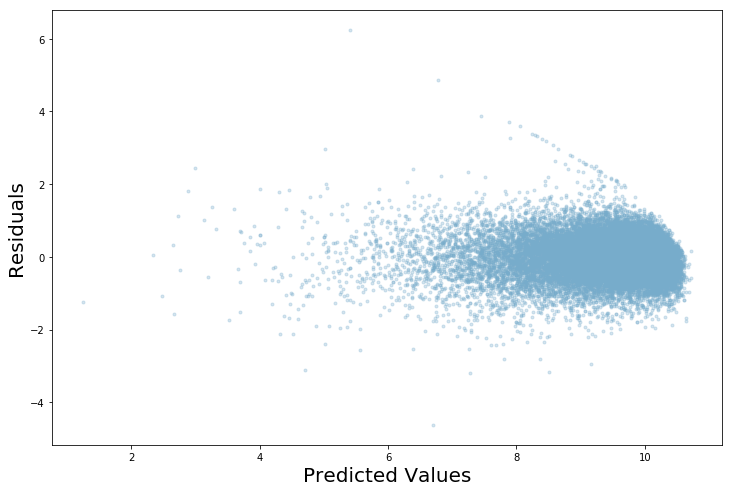

In [18]:
#plotting residual
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid, alpha=0.3, marker='.', c='#77accb')
plt.xlabel('Predicted Values', size = 20)
plt.ylabel('Residuals', size = 20);

In [20]:
#remove individual games rank
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rank195 ~ age + bmi + rank191 + rank192 + rank193 + rank194', data=male_df, return_type="dataframe")

# Create your model
model2 = sm.OLS(y, X)

# Fit your model to your training set
fit2 = model2.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rank195   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:59:14   Log-Likelihood:                -21617.
No. Observations:               27096   AIC:                         4.325e+04
Df Residuals:                   27089   BIC:                         4.330e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7850      0.066     11.937      0.000       0.656       0.914
age           -0.0046      0.001     -8.677      0.000      -0.006      -0.004
bmi           -0.0170      0.002     -8.626      0.000      -0.021      -0.013
rank191        0.1217      0.004     32.259      0.000       0.114       0.129
rank192        0.3254      0.006     58.162      0.000       0.314       0.336
rank193        0.1179      0.004     28.073      0.000       0.110       0.126
rank194        0.4046      0.005     77.423      0.000       0.394       0.415
==============================================================================
Omnibus:                     1874.321   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9749.122
Skew:                           0.002   Prob(JB):                         0.00
Kurtosis:                       5.939   Cond. No.                         912.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

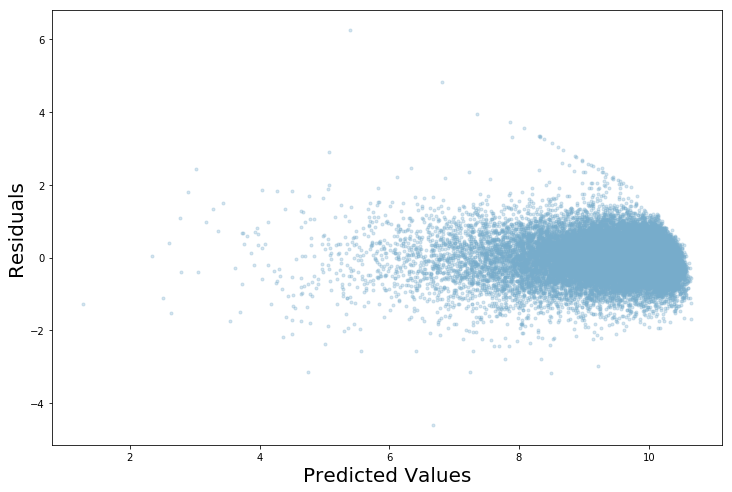

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid, alpha=0.3, marker='.', c='#77accb')
plt.xlabel('Predicted Values', size = 20)
plt.ylabel('Residuals', size = 20);

## 7. Linear model assumption testings

### Assumption 1: regression is linear in parameters and correctly specified

In [22]:
import scipy.stats as stats

In [23]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y, alpha=0.1)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res, alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

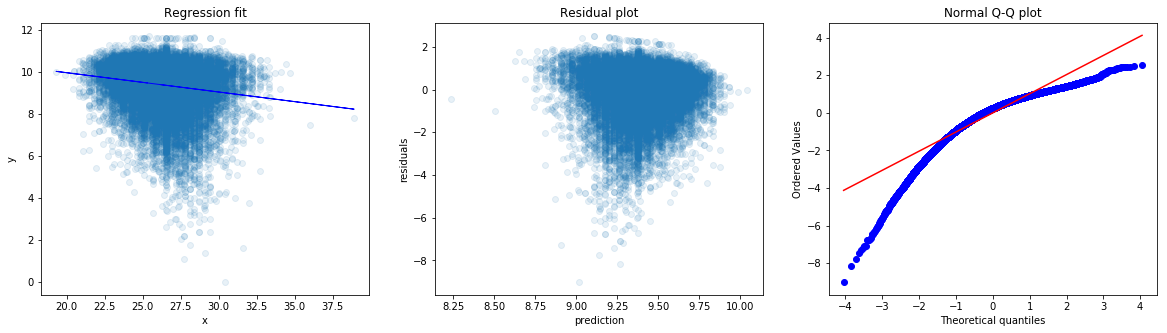

In [24]:
y = male_df['rank195']
assumption1_x1 = np.array(male_df['bmi'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

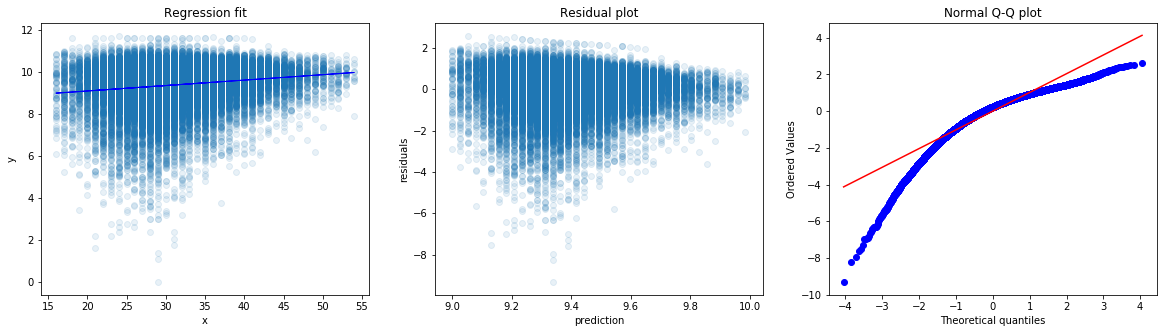

In [25]:
y = male_df['rank195']
assumption1_x1 = np.array(male_df['age'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

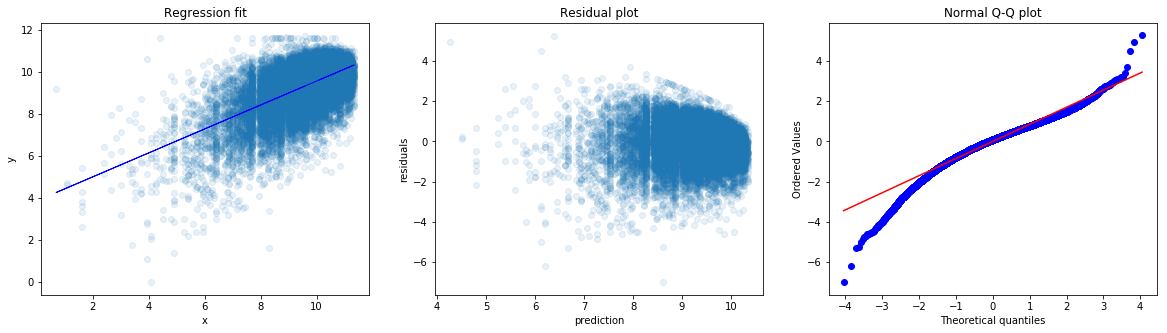

In [27]:
y = male_df['rank195']
assumption1_x1 = np.array(male_df['rank191'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

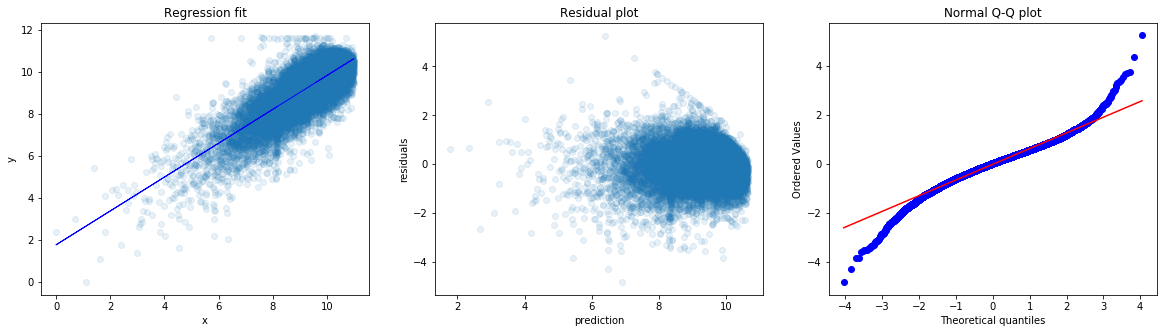

In [28]:
y = male_df['rank195']
assumption1_x1 = np.array(male_df['rank192'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

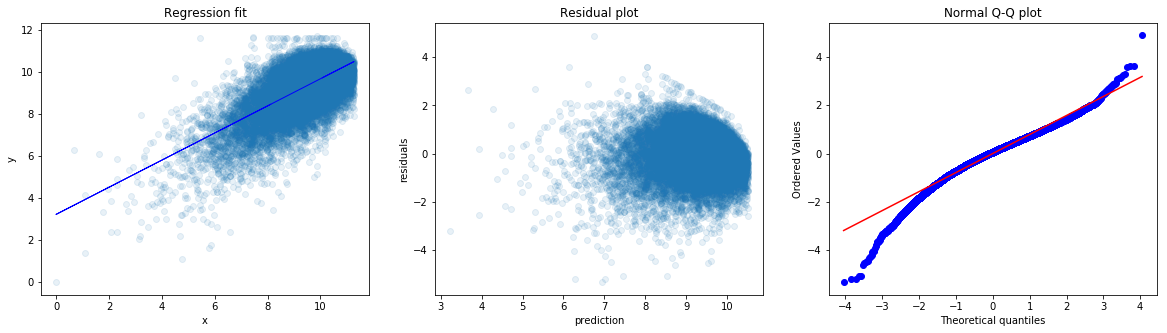

In [29]:
y = male_df['rank195']
assumption1_x1 = np.array(male_df['rank193'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

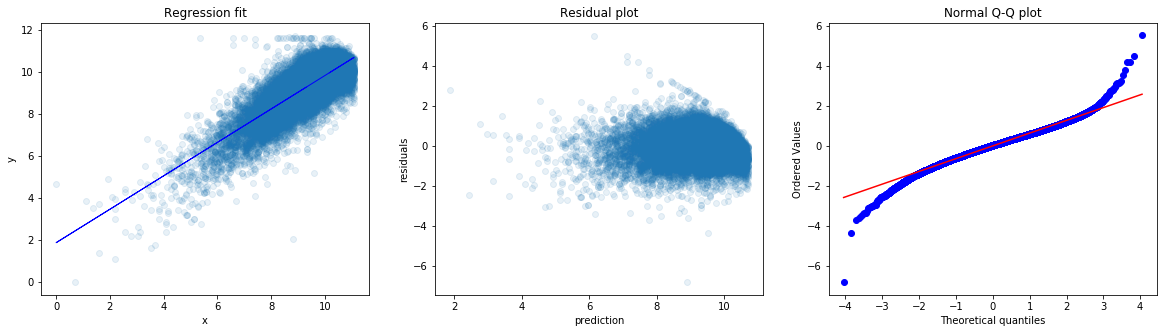

In [30]:
y = male_df['rank195']
assumption1_x1 = np.array(male_df['rank194'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

### Assumption 2: residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean

In [31]:
X, y = male_df.drop('rank195', axis =1), male_df['rank195']

In [32]:
# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y) # for later use

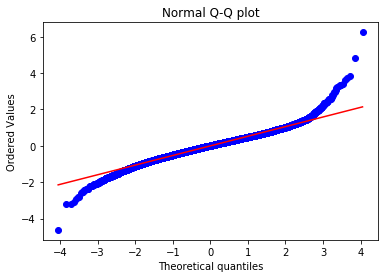

In [33]:
# diagnose/inspect residual normality using qqplot:
male_df['predict'] = fit.predict(X)
male_df['residual'] = male_df['rank195'] - male_df['predict']
stats.probplot(male_df['residual'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

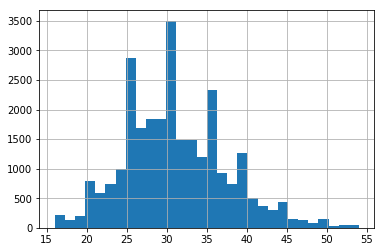

In [34]:
# inspect histogram
#logy = np.sqrt(male_df['rank195'])
#logy.hist(bins=30)
male_df['age'].hist(bins=30)

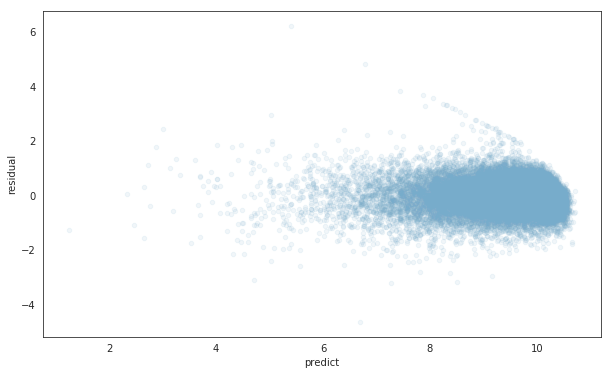

In [35]:
male_df['predict'] = fit.predict(X)
male_df['residual'] = male_df['rank195'] - male_df['predict']
with sns.axes_style('white'):
    plot=male_df.plot(kind='scatter',
                  x='predict',y='residual',alpha=0.1,c='#77accb',figsize=(10,6))

### Assumption 3: error terms must have constant variance

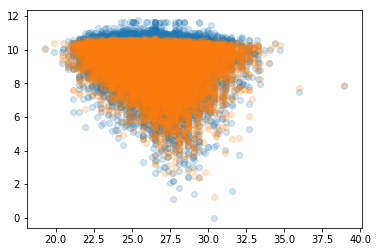

In [36]:
y = male_df['rank195']
plt.scatter(male_df['bmi'],y, alpha=0.2)
plt.scatter(male_df['bmi'],male_df['predict'], alpha=0.2);

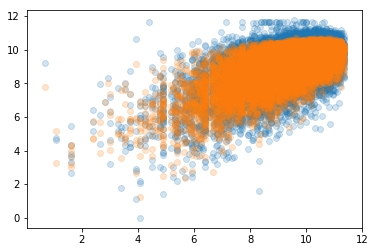

In [37]:
y = male_df['rank195']
plt.scatter(male_df['rank191'],y, alpha=0.2)
plt.scatter(male_df['rank191'],male_df['predict'], alpha=0.2);

### Assumption 4: errors are uncorrelated across observations

In [38]:
male_df.head()

,age,bmi,rank191,rank192,rank193,rank194,rank195,australia,brazil,canada,denmark,iceland,russian_federation,switzerland,united_kingdom,united_states,predict,residual
0,36,26.2,9.577965,9.603800,10.072344,9.302372,9.445254,0,0,0,0,0,0,0,0,0,9.430759,0.014495
1,28,26.2,9.198369,9.723882,10.131897,9.173054,9.629248,0,0,0,0,0,0,0,0,0,9.408217,0.221031
2,37,27.3,10.500674,9.338734,9.594105,8.089482,9.298351,0,0,0,0,0,0,0,0,1,8.834065,0.464286
3,26,27.2,9.085684,9.400051,9.819508,9.856186,9.808517,0,0,0,0,0,0,0,0,1,9.474907,0.333610
4,26,26.8,9.577965,9.944917,9.294773,9.699104,9.553930,1,0,0,0,0,0,0,0,0,9.718864,-0.164934


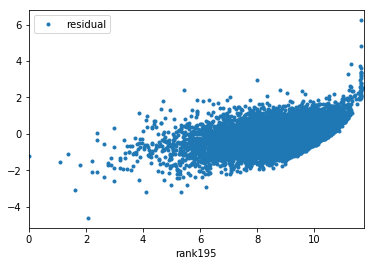

In [39]:
ts4 = male_df[['rank195','residual']].set_index('rank195')
ts4.plot(style=".");

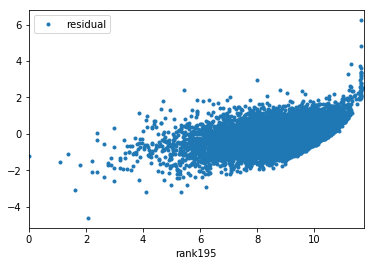

In [40]:
ts4 = male_df[['rank195','residual']].set_index('rank195')
ts4.plot(style=".");

### Assumption 5: no independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

## 8. Evaluation on test